In [50]:
import json
from charts import (
    get_charts_data,
    plot_labels_pie,
    label_epic,
    label_v9,
    plot_components_issue_bar,
    plot_issues_in_the_past_12_months_line,
    plot_backlog_grooming_line,
    plot_closed_epics_line,
)

issues_data = "2024-05"
json_file = open(f"data/{issues_data}/issues.json")

all_issues = json.load(json_file)
_, issues_minimal, df_issues, df_issues_closed, issue_labels = get_charts_data(
    all_issues
)

print(f"Total issues: {len(all_issues)}")

Total issues: 2839


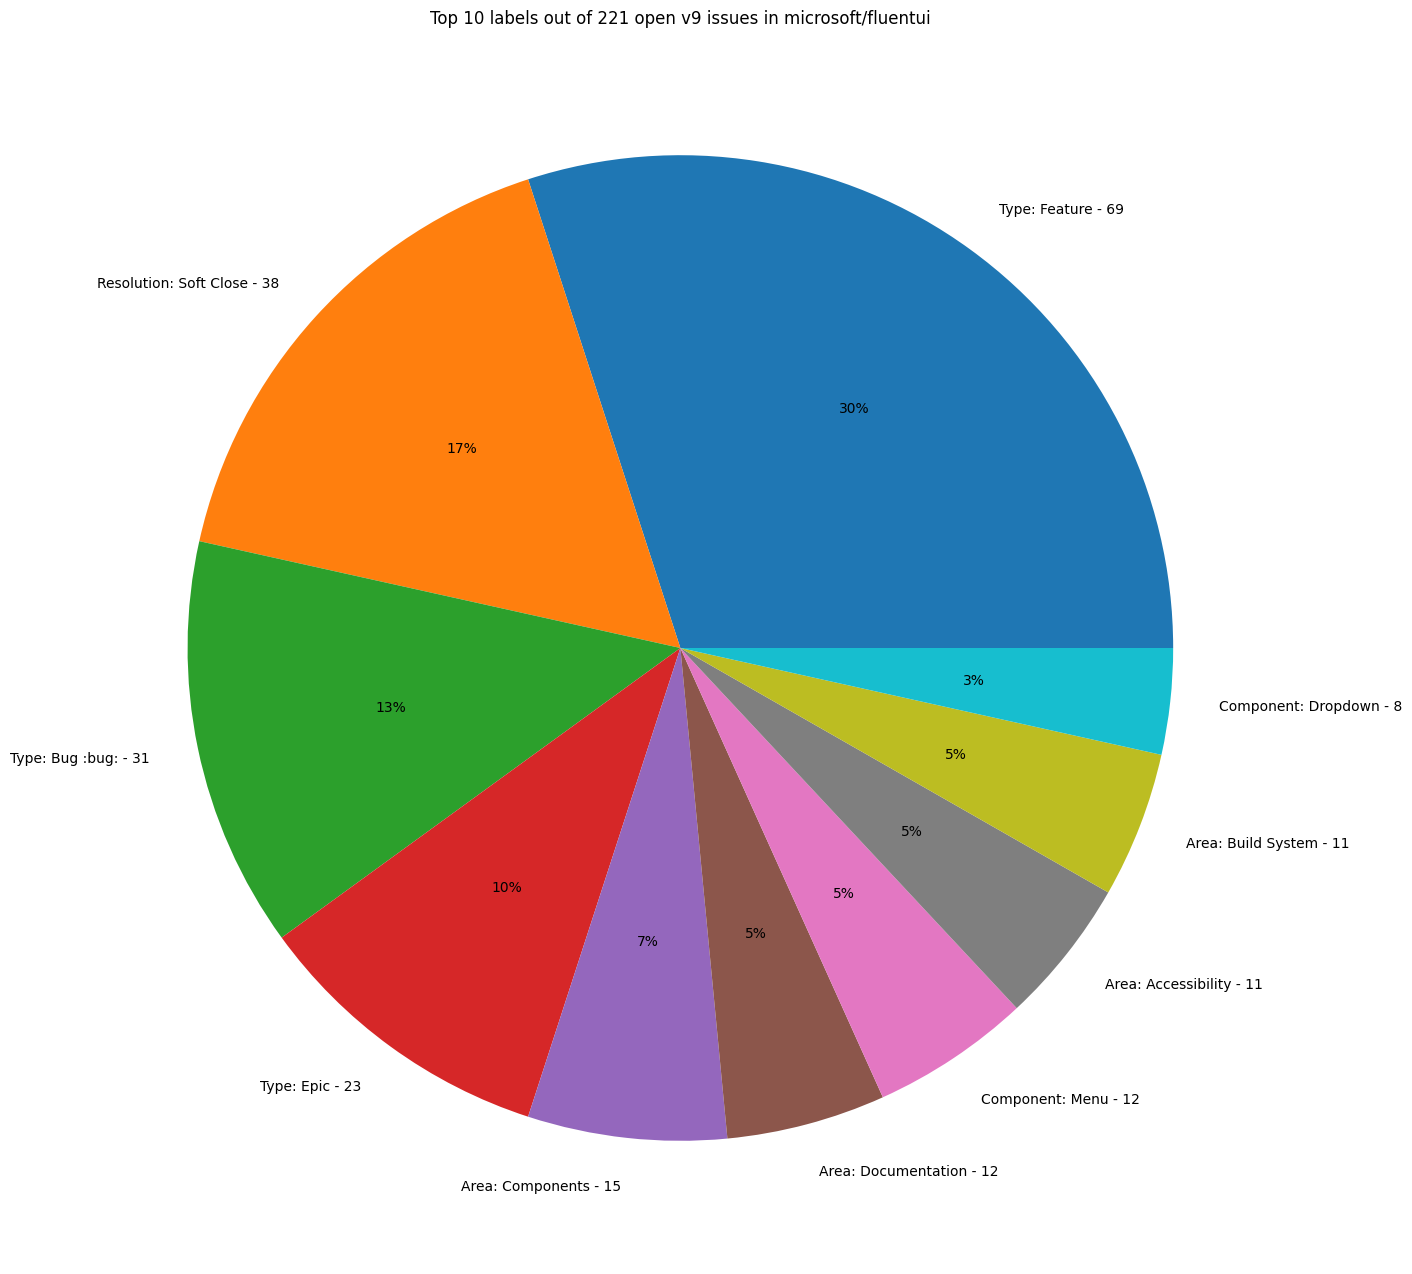

In [51]:
plt = plot_labels_pie(issue_labels)
plt.show()

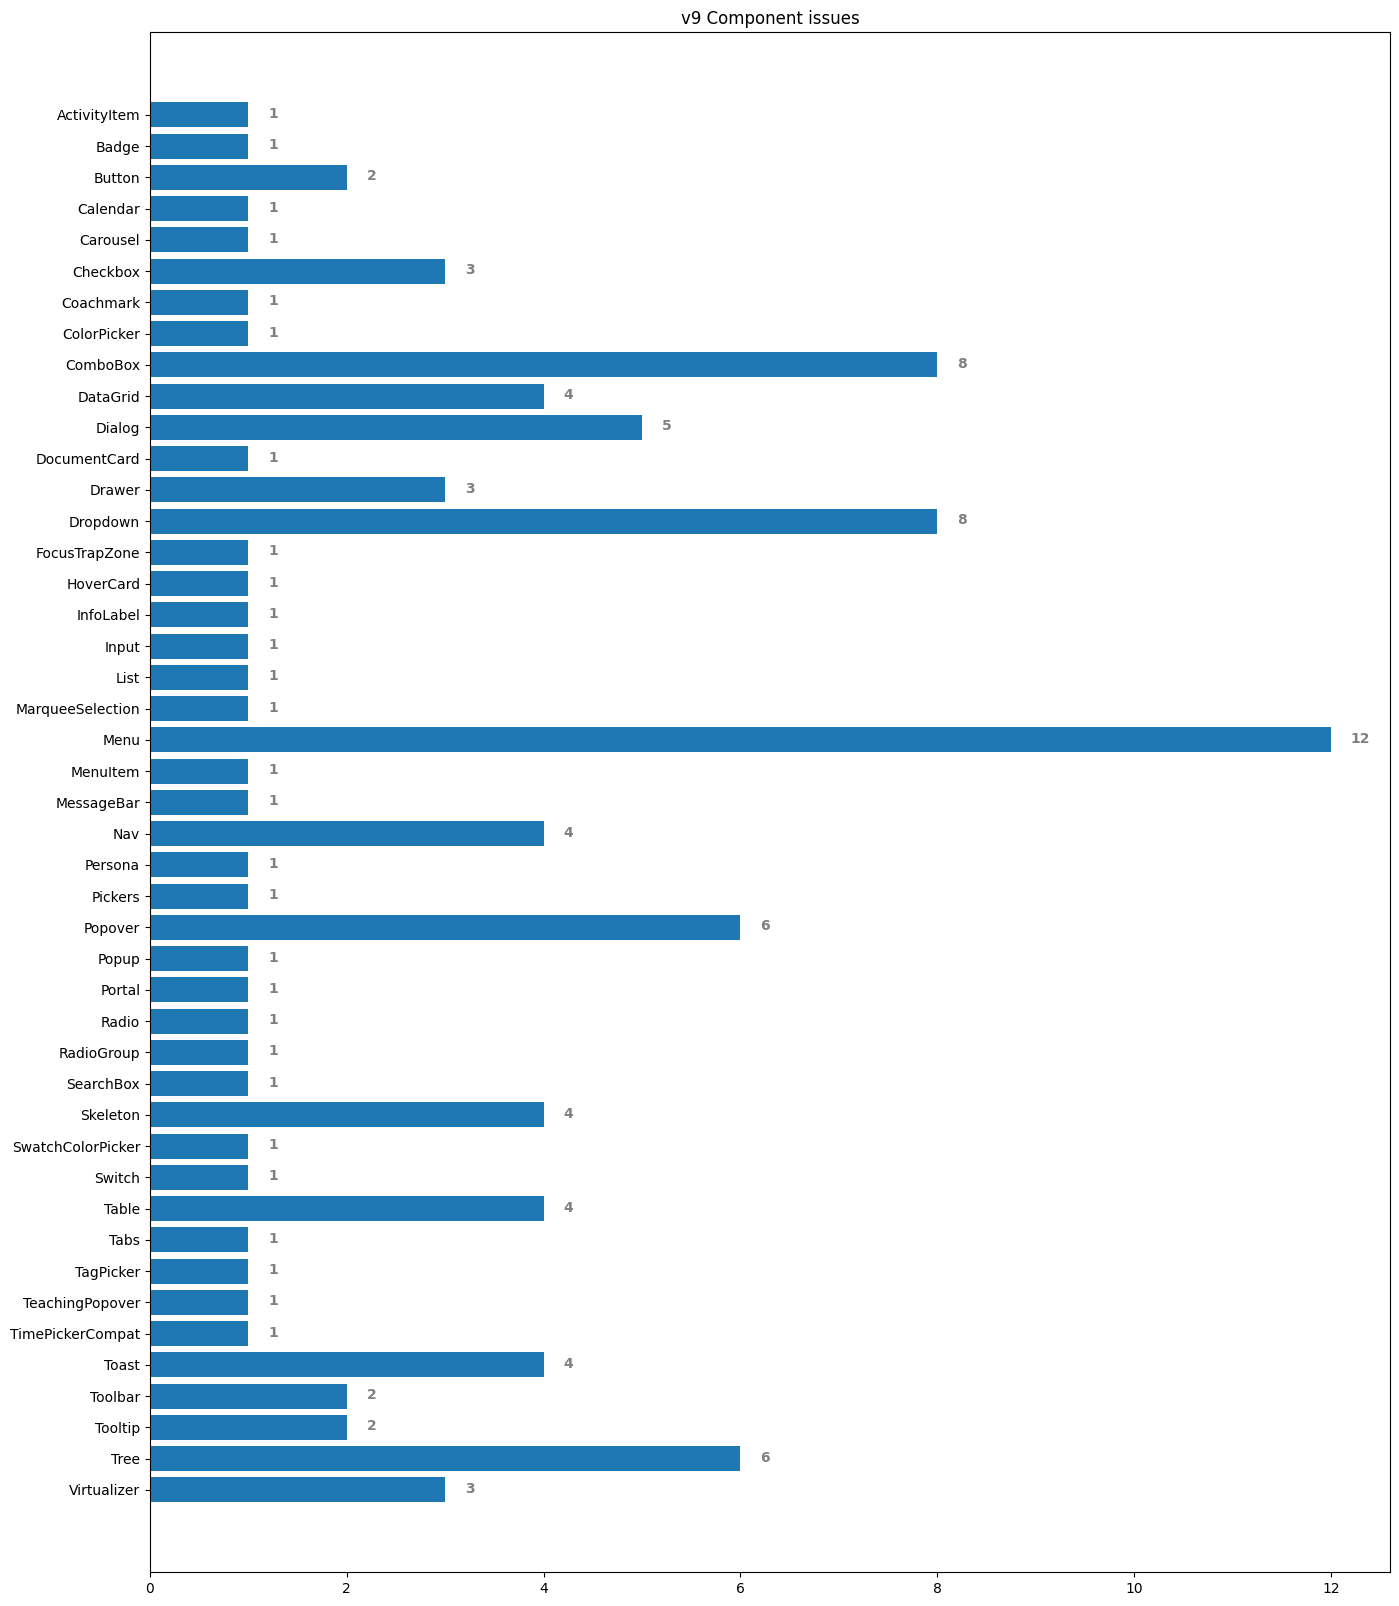

In [52]:
plt = plot_components_issue_bar(issue_labels)
plt.show()

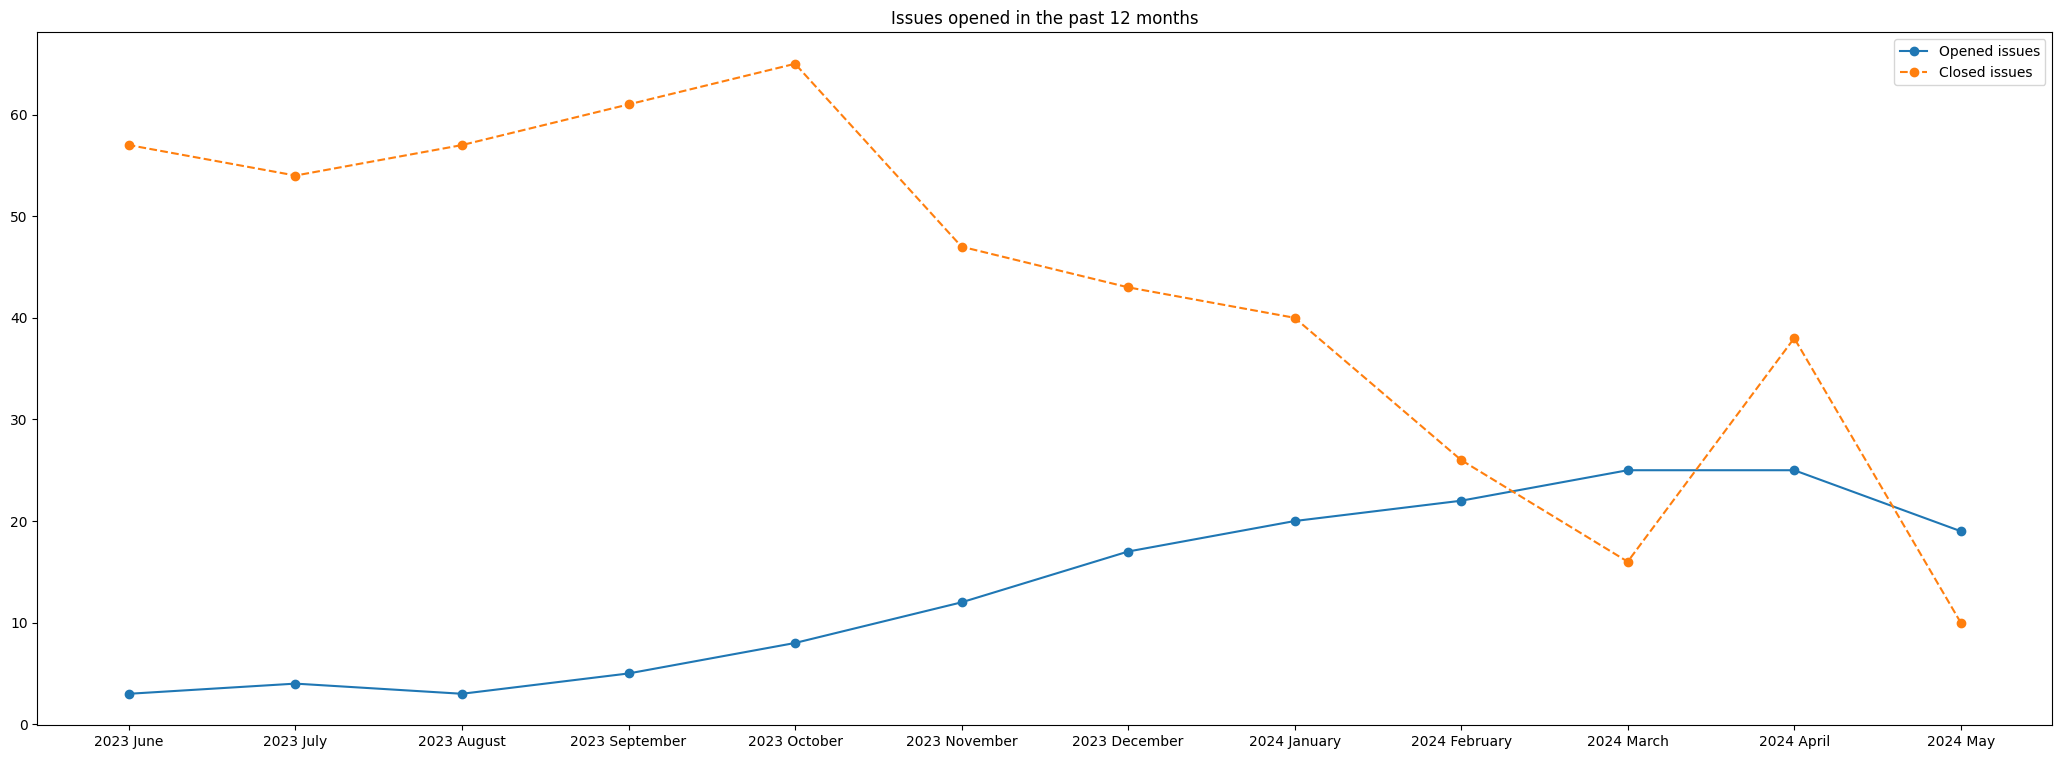

In [53]:
plt = plot_issues_in_the_past_12_months_line(df_issues, df_issues_closed)
plt.show()

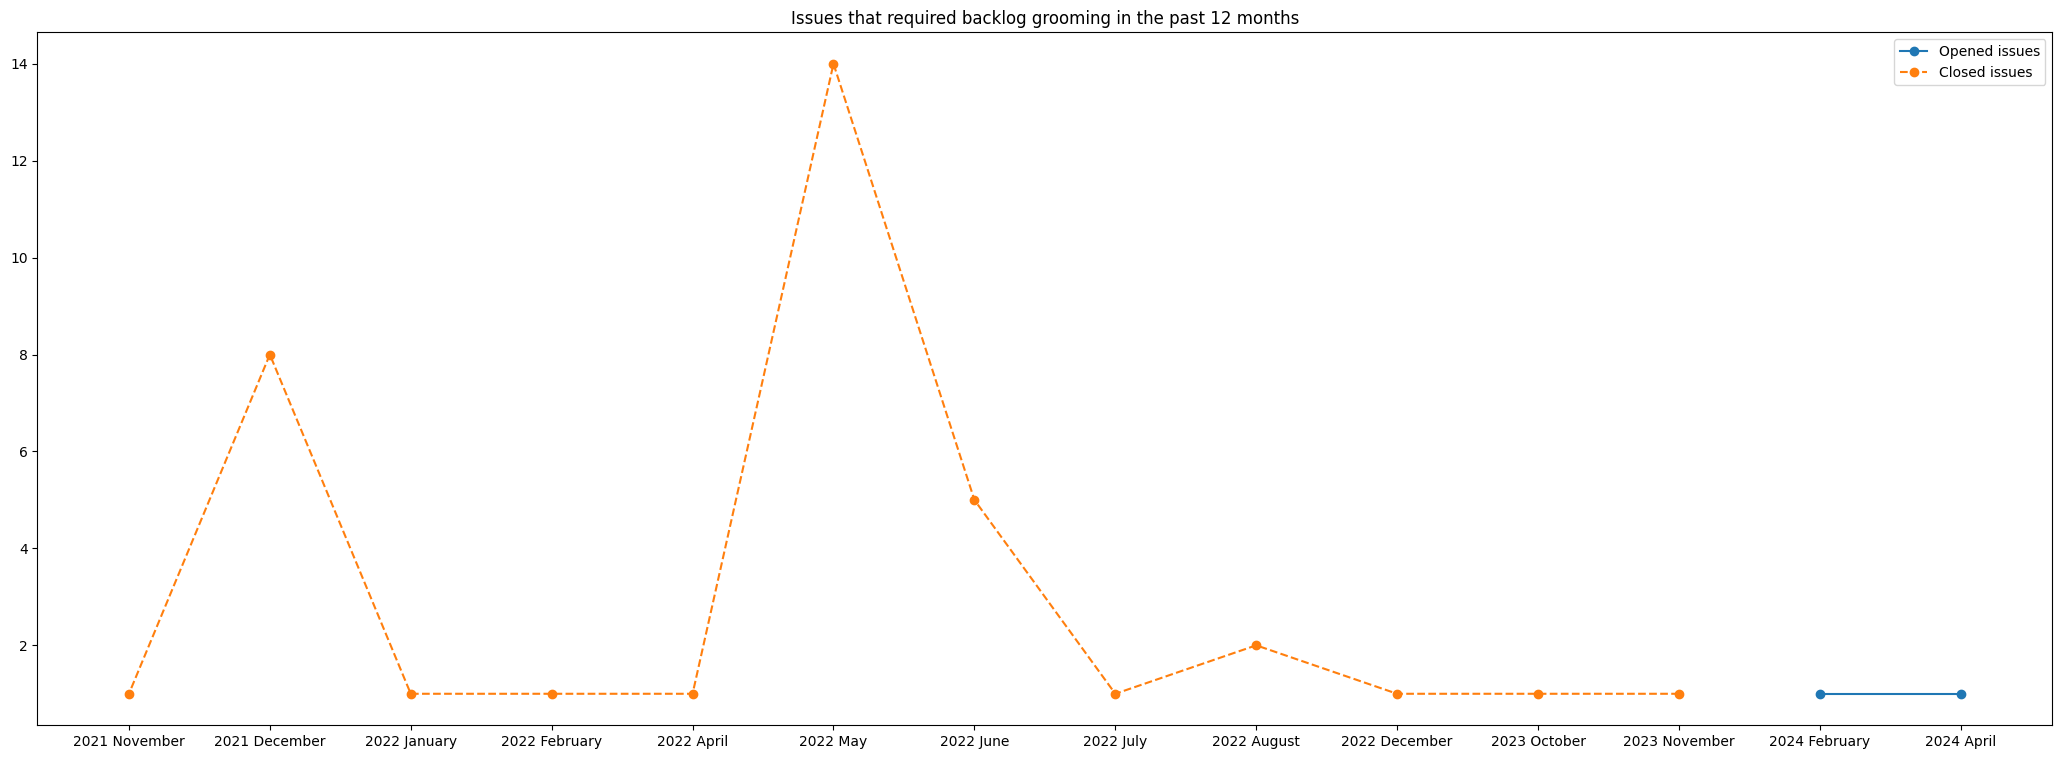

In [54]:
plt = plot_backlog_grooming_line(df_issues, df_issues_closed)
plt.show()

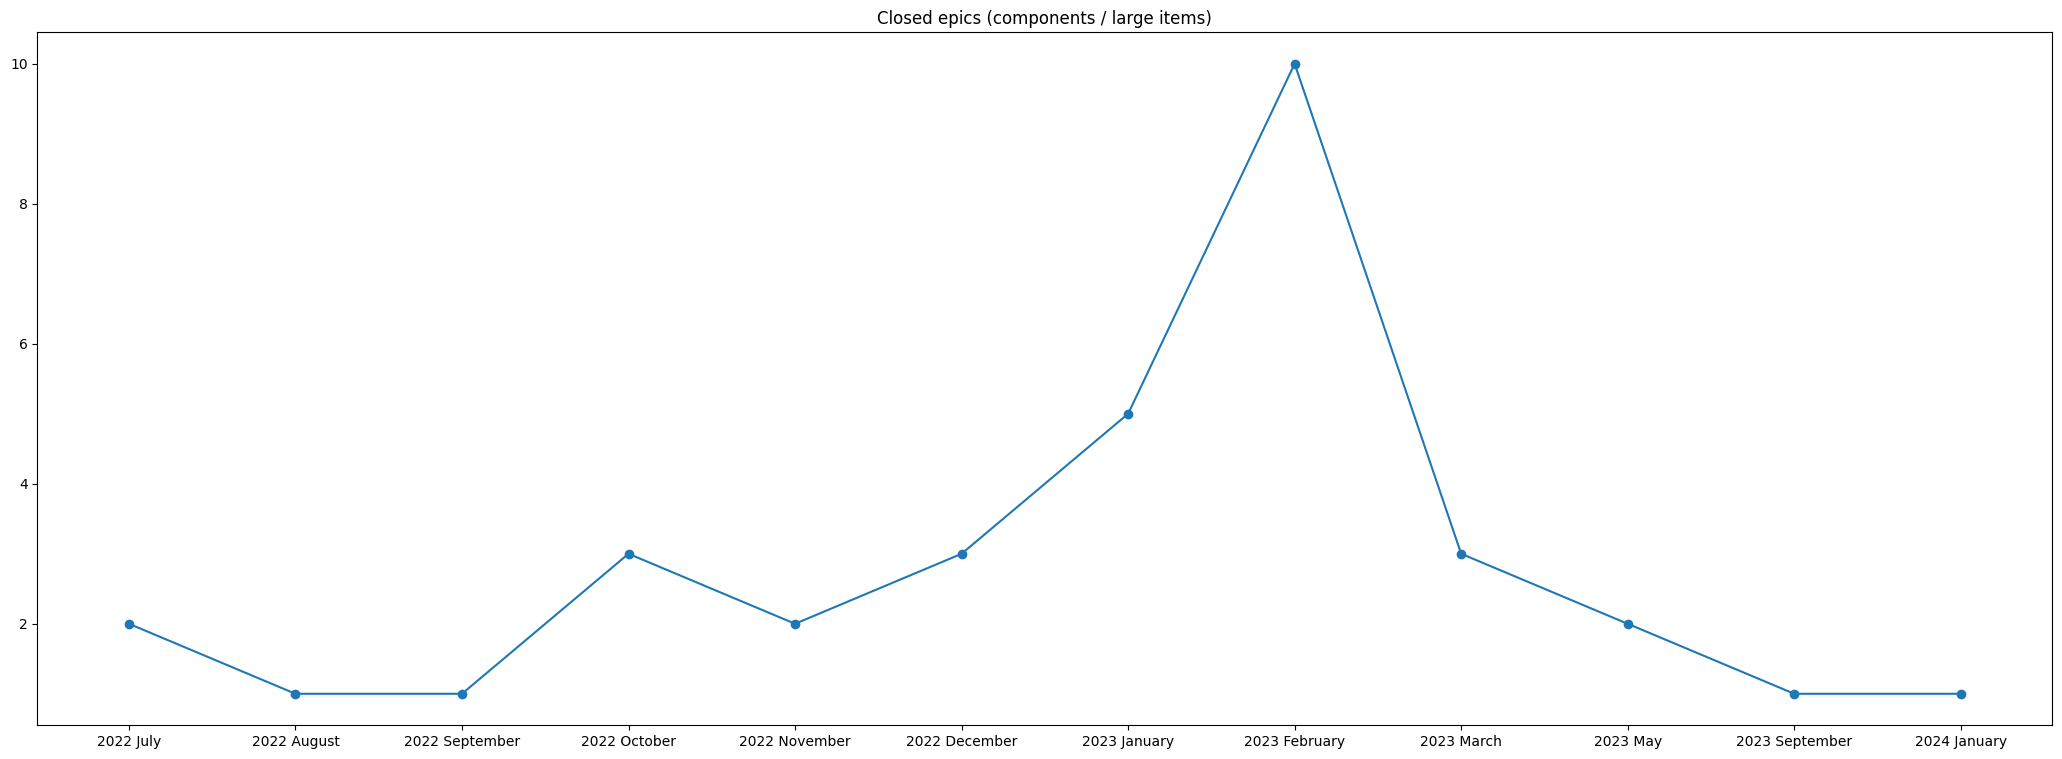

In [55]:
plt = plot_closed_epics_line(df_issues_closed, label_v9, label_epic)
plt.show()